In [1]:
print("""
INTERVIEW QUESTIONS:

1. What is Bagging?
Bagging (Bootstrap Aggregating) trains multiple models on random subsets of data and averages their predictions to reduce variance.

2. What is Boosting?
Boosting trains models sequentially where each new model focuses on previous errors, improving weak learners.

Difference:
Bagging reduces variance.
Boosting reduces bias and variance.

3. How to handle imbalanced data?
- Class weights
- Oversampling (SMOTE)
- Undersampling
- Using suitable metrics (F1, Recall)
- Ensemble methods

Here class_weight='balanced' is used.

CONCLUSION:
Random Forest performed strongly due to ensemble learning.
Boosting further improves difficult classifications.
These models are powerful for real-world multiclass problems like glass identification.
""")


INTERVIEW QUESTIONS:

1. What is Bagging?
Bagging (Bootstrap Aggregating) trains multiple models on random subsets of data and averages their predictions to reduce variance.

2. What is Boosting?
Boosting trains models sequentially where each new model focuses on previous errors, improving weak learners.

Difference:
Bagging reduces variance.
Boosting reduces bias and variance.

3. How to handle imbalanced data?
- Class weights
- Oversampling (SMOTE)
- Undersampling
- Using suitable metrics (F1, Recall)
- Ensemble methods

Here class_weight='balanced' is used.

CONCLUSION:
Random Forest performed strongly due to ensemble learning.
Boosting further improves difficult classifications.
These models are powerful for real-world multiclass problems like glass identification.



Dataset Shape: (214, 10)
Columns: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.524967,13.242365,4.287637,1.270204,72.017351,0.471848,8.114011,0.609625,0.167267,3
1,1.518617,13.779485,0.061891,0.648429,72.929991,0.786224,7.568767,0.437011,0.134742,4
2,1.526477,13.013587,0.925112,1.277128,72.213444,0.546093,7.063795,0.511344,0.003533,3
3,1.535230,13.281591,-0.358848,1.263638,73.043052,0.269795,9.407991,0.020474,0.040947,5
4,1.517658,13.157318,2.295890,0.051557,72.742046,1.097760,7.796633,0.127280,0.083198,1



EDA Data Types:
RI    float64
Na    float64
Mg    float64
Al    float64
Si    float64
K     float64
Ca    float64
Ba    float64
Fe    float64
dtype: object


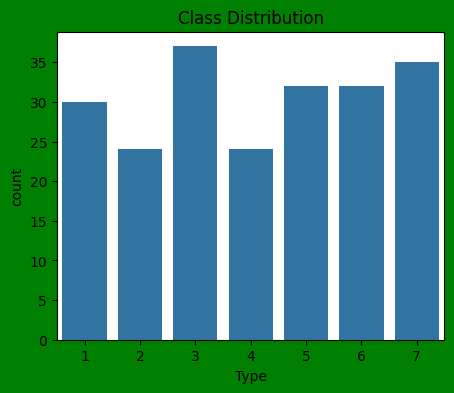

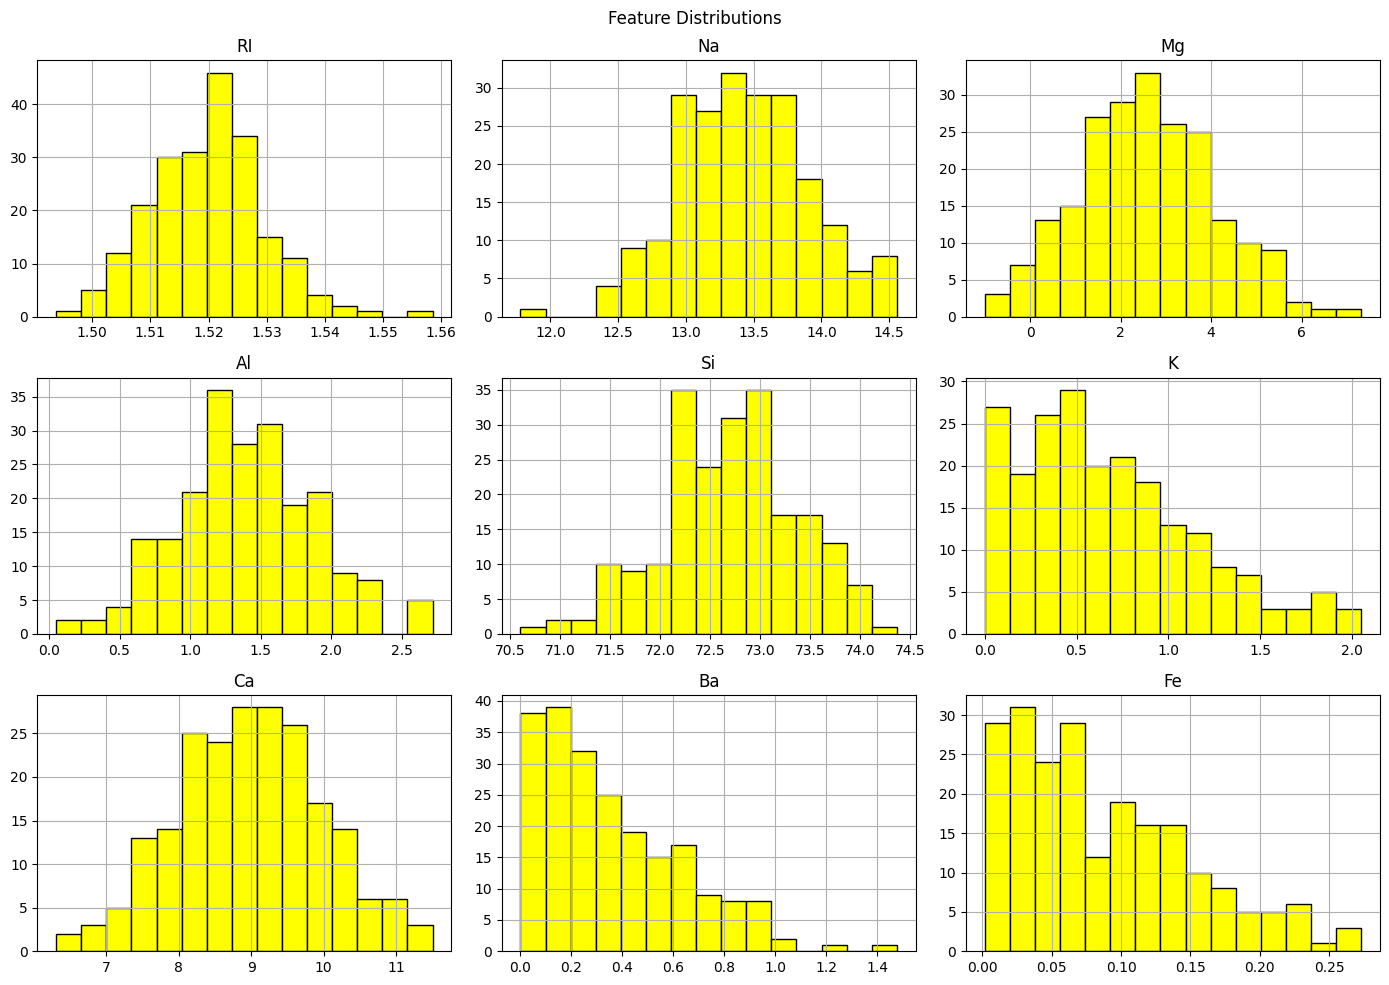

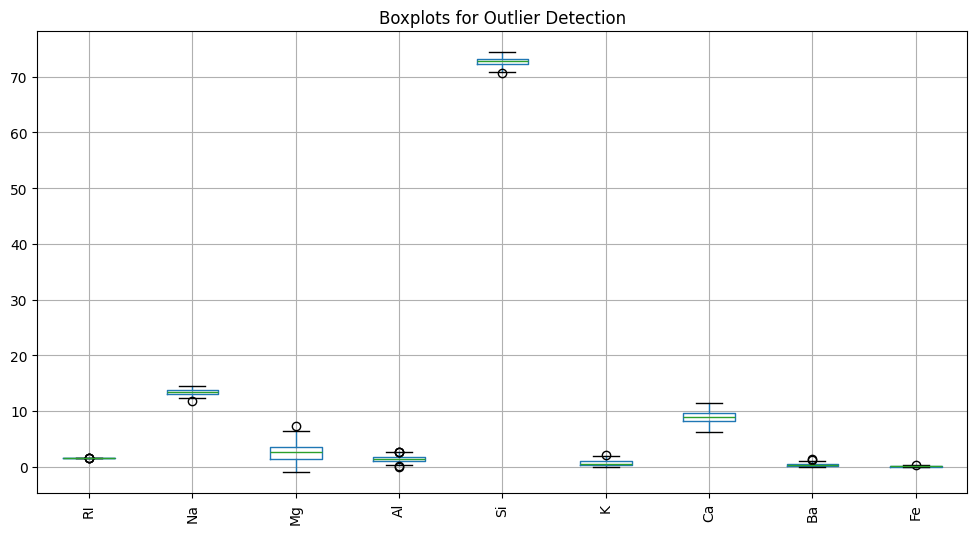

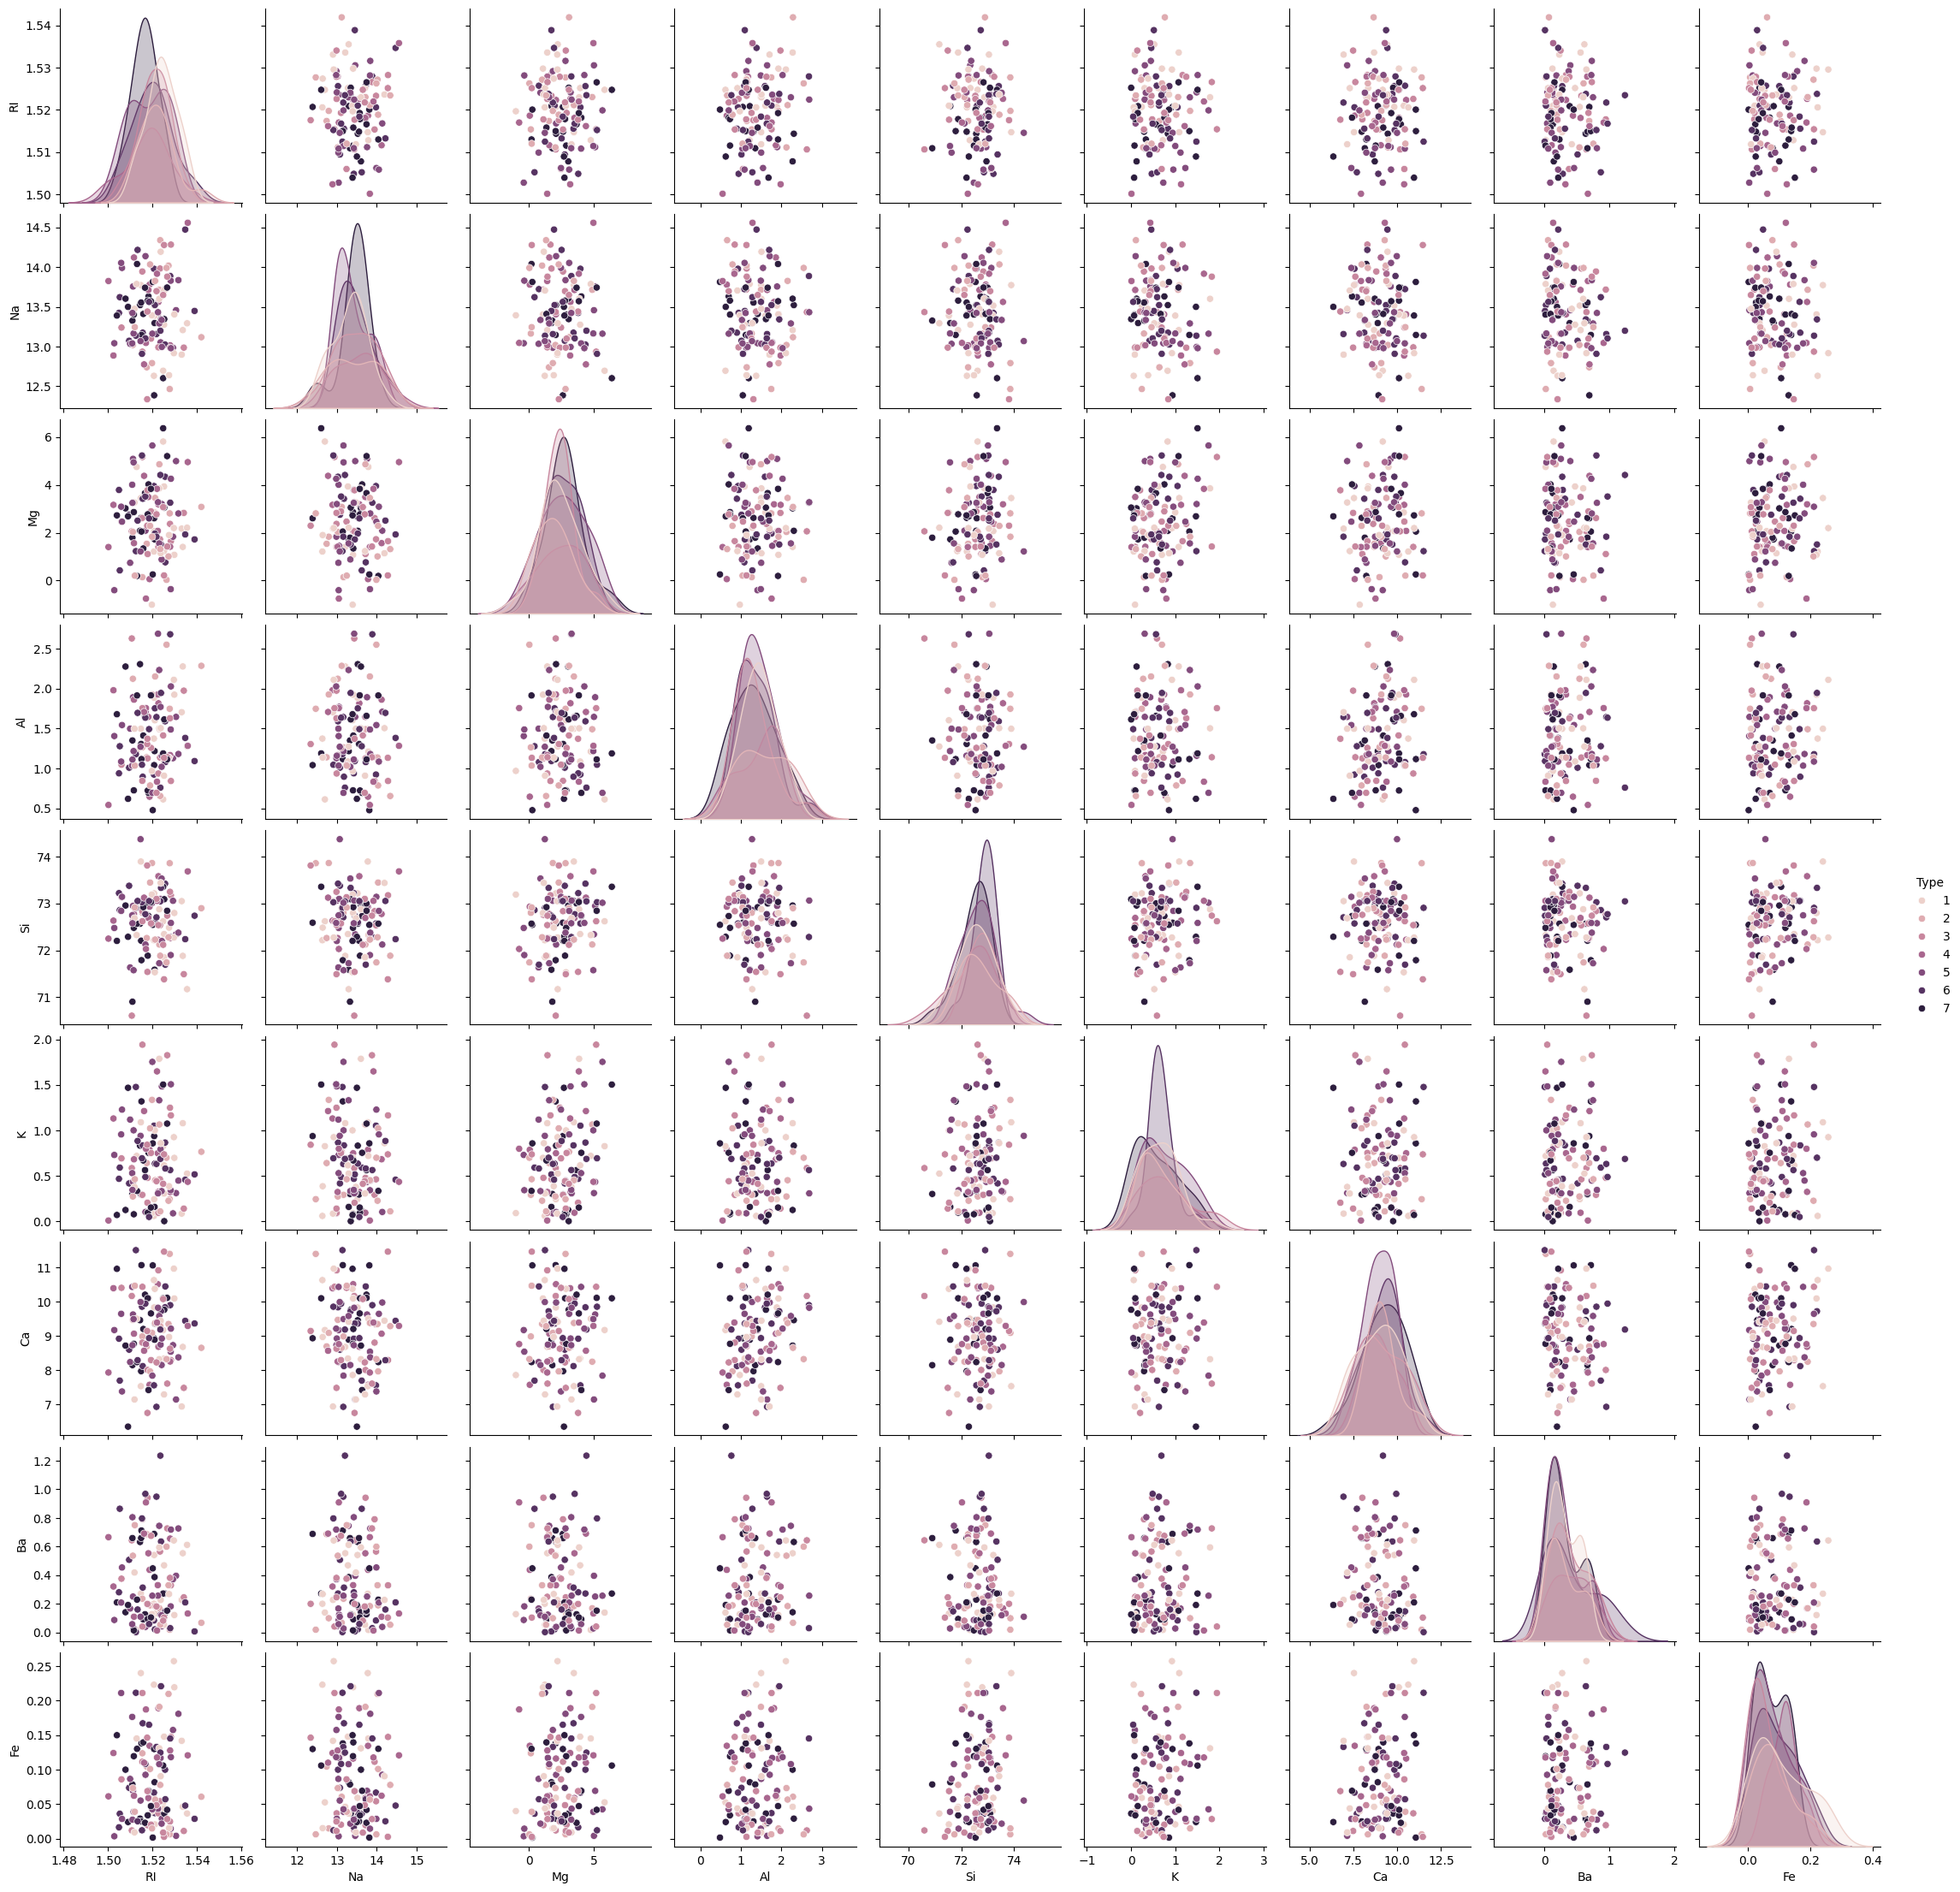

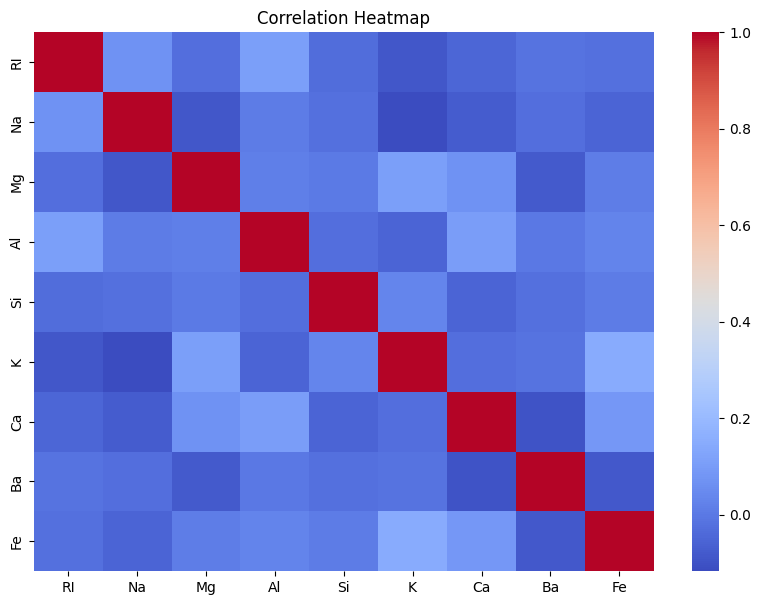


Class Distribution:
 Type
3    37
7    35
5    32
6    32
1    30
4    24
2    24
Name: count, dtype: int64

Random Forest Accuracy: 0.046511627906976744

Random Forest Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.09      0.12      0.11         8
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         6
           6       0.20      0.17      0.18         6
           7       0.00      0.00      0.00         7

    accuracy                           0.05        43
   macro avg       0.04      0.04      0.04        43
weighted avg       0.04      0.05      0.04        43



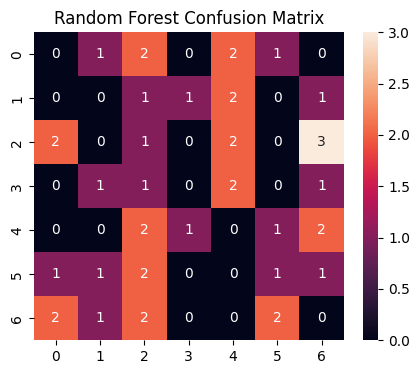

Bagging Accuracy: 0.13953488372093023
Boosting Accuracy: 0.11627906976744186


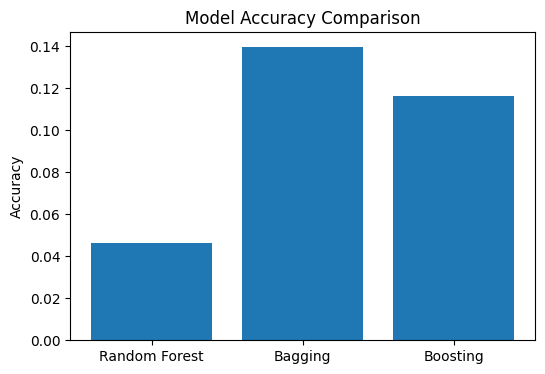

In [ ]:
# ============================================================
# Random Forest, Bagging & Boosting – Glass Dataset
# COMPLETE SINGLE CELL SOLUTION
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# ------------------------------------------------------------
# 1. Load Dataset Safely
# ------------------------------------------------------------
df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/glass.csv")
df.columns = df.columns.str.strip()

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# ------------------------------------------------------------
# 2. Target Column (assume last column)
# ------------------------------------------------------------
target_col = df.columns[-1]

# ------------------------------------------------------------
# 3. Create Permanent Numeric EDA Dataset
# ------------------------------------------------------------
X_eda = df.drop(columns=[target_col]).copy()

for col in X_eda.columns:
    X_eda[col] = (
        X_eda[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    X_eda[col] = pd.to_numeric(X_eda[col], errors="coerce")

X_eda = X_eda.fillna(X_eda.median())

y = df[target_col]

print("\nEDA Data Types:")
print(X_eda.dtypes)

# ------------------------------------------------------------
# 4. Class Distribution
# ------------------------------------------------------------
plt.figure(figsize=(5,4), dpi=100, facecolor='g', edgecolor='k')
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# ------------------------------------------------------------
# 5. Histograms
# ------------------------------------------------------------
X_eda.hist(bins=15, figsize=(14,10), layout=(3,3), color='yellow', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 6. Boxplots
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
X_eda.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection")
plt.show()

# ------------------------------------------------------------
# 7. Pairplot (sampled for speed)
# ------------------------------------------------------------
eda_pair = X_eda.copy()
eda_pair[target_col] = y
sns.pairplot(eda_pair.sample(min(120, len(eda_pair))), hue=target_col)
plt.show()

# ------------------------------------------------------------
# 8. Correlation Heatmap
# ------------------------------------------------------------
plt.figure(figsize=(10,7))
sns.heatmap(X_eda.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------------------------------------
# 9. Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_eda)

# ------------------------------------------------------------
# 10. Train Test Split (80–20)
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nClass Distribution:\n", y.value_counts())

# ------------------------------------------------------------
# 11. Random Forest (with imbalance handling)
# ------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ------------------------------------------------------------
# 12. Bagging
# ------------------------------------------------------------
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

# ------------------------------------------------------------
# 13. Boosting (AdaBoost)
# ------------------------------------------------------------
boost = AdaBoostClassifier(n_estimators=100, random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))

# ------------------------------------------------------------
# 14. Model Comparison
# ------------------------------------------------------------
models = ["Random Forest","Bagging","Boosting"]
scores = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bag),
    accuracy_score(y_test, y_pred_boost)
]

plt.figure(figsize=(6,4))
plt.bar(models, scores)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()